In [38]:
import nltk
import pandas as pd
import re

In [2]:
df = pd.read_csv('LTD_rawevents.csv')
df.sample(15)

,STATE,CITY,US REGION,US DISTRICT,AIRPORT CODE(S),AIRPORT DISTANCE (MI),MONTH,DATES,EVENT NAME,EVENT TYPE,...,CREDENTIALS SENT?,FOLLOW UP TO CREDENTIALS,TARGET DEMOGRAPHIC,EVENT COST,NEAREST AIRPORT,SECONDARY AIRPORT,MILES TO NEAREST AIRPORT,MILES TO SECOND AIRPORT,MASS TRANSIT AVAILABLE,EVENT URL JUN 7 2020
169,Massachusetts,Nantucket,Northeast,New England,"ACK, MVY","4, 36",Jul,Mid Jul,Nantucket Yoga Festival,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://nantucketyogafestival.com/
1458,Iowa,Cedar Rapids,Midwest,West North Central,"CID, ALO","9, 63",Aug,Late Aug,Fields of Yogis,Yoga Festival,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://fieldsofyogis.org/
724,Mississippi,Ridgeland,South,East South Central,JAN,17,Apr,Early Apr,Ridgeland Fine Arts Festival,Arts,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.ridgelandartsfest.com/
270,New York,Naples,Northeast,Mid-Atlantic,"ROC, ELM","53, 59",Sept,Late Sept,Naples Grape Festival,Food/Community Festival,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://naplesgrapefest.org/
312,New York,Rhinebeck,Northeast,Mid-Atlantic,"SWF, ALB","51, 66",Jul,Mid Jul,Hudson Valley Hot-Air Balloon Festival,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.dcrcoc.org/balloonfesthv.org
381,Pennsylvania,Philadelphia,Northeast,Mid-Atlantic,"PHL, TTN","9, 34",Dec,Early Dec,Valley Forge Beer & Cider Festival,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.valleyforgebeerfest.com/
570,Florida,St. Peterburg,South,South Atlantic,"PIE, TPA","13, 20",Nov,Mid Nov,Tampa Bay Times Festival of Reading,"Arts, Cultural Festival",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.tampabay.com/expos/festival-of-read...
121,Maine,Machias,Northeast,New England,"BHB, BGR","61, 91",Aug,Mid Aug,Machias Wild Blueberry Festival,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.machiasblueberry.com/
1778,New York,New York,Northeast,Mid-Atlantic,"LGA, EWR","12, 14",Jul,Late Jul,Latino Film Market,Film,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.latinofilmmarket.com/
719,Mississippi,Jackson,South,East South Central,JAN,12,Mar,Late Mar,Celtic Fest Mississippi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://celticfestms.org/wp/


In [28]:
events_df = df[['STATE', 'CITY', 'US REGION', 'MONTH', 'DATES', 'EVENT NAME', 'EVENT TYPE', 'WHAT TO DO?', 'EVENT DESC (1 SC)', 'GOOD 4 KIDS?', 'ADMISSION (FREE/FEE)', 'FEE DETAIL']]

In [29]:
events_df.sample(20)

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL
534,Florida,Kissimmee,South,Nov,Mid Nov,Pioneer Day at Shingle Creek,Arts/food/cultural,LEARN,Celebrates Osceola County’s first residents an...,YES,FREE,NaN
306,New York,Queens,Northeast,Dec/Jan,Early Dec/Late Jan,Hello Panda Festival,NaN,"A&E, ACTIVE",A winter festival that celebrates the holiday ...,YES,FEE,$25-28 event general (per person child/adult g...
806,Tennessee,Memphis,South,Apr,Mid Apr,Rajun Cajun Crawfish Festival,Food/Beer/Wine,TASTEBUDS,"Over 30,000 festival goers will enjoy live mus...",YES,FREE,NaN
1210,Colorado,Nederland,West,Mar,Mid Mar,Frozen Dead Guy Days,Cultural Festival,A&E,Three days of frosty merriment featuring 30 li...,NaN,FEE,"Event viewing & access to outdoor beer, bar & ..."
1054,California,Los Angeles,West,Jan - Dec,Late Jan - Late Dec,The Carnival: Choreographer's Ball Los Angeles,NaN,"ACTIVE, A&E",The hottest dance show by top professional cho...,NO,NaN,NaN
221,New York,Amherst,Northeast,Aug,Mid Aug,Buffalo Niagara Scottish Festival,NaN,"LEARN, ACTIVE, A&E","Highland Games (5 World Records Set Here!), Ga...",YES,FEE,$13 event general ( discount kids + kids under...
273,New York,New York,Northeast,Feb/Mar,Late Feb/ Early Mar,Athena Film Festival,Film,A&E,A weekend of inspiring films that tell the ext...,YES,FEE,$25 - $100 event general (student + all access...
28,Wisconsin,Eagle River,Midwest,Jan,Mid Jan,World Championship Snowmobile Derby,Sporting Event,ACTIVE,"Hosting oval, snocross and vintage racing, the...",NO,FEE,"$25 Day pass, $65 Super ticket"
1571,Minnesota,New London,Midwest,Jul,Mid/Late Jul,New London Water Days,NaN,ACTIVE,This annual celebration is a weekend is filled...,YES,FEE,$10 event general (wristbands + early bird dis...
1109,California,San Diego,West,Jan,Mid/Late Jan,San Diego Travel & Adventure Show,NaN,LEARN,Learn valuable travel and destination advice f...,YES,FEE,$15-$22 event general (general admission + ear...


In [30]:
events_df['EVENT DESC (1 SC)'] = events_df['EVENT DESC (1 SC)'].fillna('')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
events_df = events_df.drop([1350, 1696])

In [32]:
events_df['Desc_with_name'] = events_df[['EVENT NAME', 'EVENT DESC (1 SC)']].apply(lambda x: ' '.join(x), axis=1)
events_df.sample(10)

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name
841,Texas,Dallas,South,Apr,Early Apr,The Dallas Festival of Ideas,"Community, Cultural Festival",LEARN,The Dallas Festival of Ideas is a celebration ...,NaN,FREE,NaN,The Dallas Festival of Ideas The Dallas Festiv...
767,Oklahoma,Oklahoma City,South,Jun,Early Jun,deadCenter Film Festival,Film,A&E,,NaN,NaN,NaN,deadCenter Film Festival
1673,Ohio,Harveysburg,Midwest,Sept/Oct,Early Sept/Late Oct,Ohio Renaissance Festival,Renaissance Festival,A&E,"Played out over a 30-acre, recreated 16th-cent...",YES,FEE,$21 - $23 event general ($9.50 kids + kids und...,Ohio Renaissance Festival Played out over a 30...
1796,North Carolina,Wilmington,South,May,Early May,Cape Fear Comedy,Comedy Festival,A&E,,NaN,NaN,NaN,Cape Fear Comedy
753,North Carolina,Murfreesboro,South,Jul/Aug,Late Jul/Early Aug,The NC Watermelon Festival,Food Festival,TASTEBUDS,,NaN,NaN,NaN,The NC Watermelon Festival
387,Pennsylvania,Pittsburgh,Northeast,Jul,Mid Jul,Pittsburgh Vintage Grand Prix,Sporting Event/Festival,A&E,Our mission to hold a world-class vintage auto...,NO,FEE,$15 event general (One Day). $25 event premium...,Pittsburgh Vintage Grand Prix Our mission to h...
1118,California,San Francisco,West,Sep,Late Sep,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,$35 event general.,Cotopaxi Questival The Cotopaxi Questival is a...
1889,Wyoming,Sheridan,West,Aug,Late Aug,Best of the West BBQ Fest,Food Festival,TASTEBUDS,Sheridanmotor.com Best of the West BBQ Fest is...,YES,FREE,NaN,Best of the West BBQ Fest Sheridanmotor.com Be...
276,New York,New York,Northeast,Jan,Late Jan,Beer Bourbon & BBQ Festival,Food & Drink Festival,TASTEBUDS,Get ready to enjoy all those pleasures that tr...,NO,FEE,$99-$109 event general (session admission. Mor...,Beer Bourbon & BBQ Festival Get ready to enjoy...
1414,Illinois,Rock Island,Midwest,Feb,Mid Feb,"QCCA Fishing, Hunting, and Outdoor Adventure Show",NaN,ACTIVE,This four-day event features a variety of reso...,YES,FEE,$8 event general ($1 kids + kids under 6 free ...,"QCCA Fishing, Hunting, and Outdoor Adventure S..."


In [27]:
events_df.head()

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,FEE,Tickets coming soon!,Bacon and Beer Classic Prepare yourself for 10...
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,FEE,NOT IN 2019,Cotopaxi Questival The Cotopaxi Questival is a...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,Gluten Free and Allergen Friendly Expo Premier...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,FEE,Not in 2019.,Bacon and Beer Classic We bring together the b...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,YES,$25 event general (spectator). $40-$50 registr...,Bikes and Beers Kalamazoo Featuring 15 and 30-...


In [34]:
events_df['Desc_with_name'] = events_df['Desc_with_name'].str.lower()


In [36]:
events_df.sample(15)

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name
552,Florida,Niceville,South,Oct,Mid/Late Oct,Boggy Bayou Mullet Festival,"Music, Community Festival",A&E,Festival celebrating the lowly mullet fish and...,YES,FEE,$10-$15 daily admission. Free for ages 11 and ...,boggy bayou mullet festival festival celebrati...
1906,Florida,Miami,South,May,Early May,Japanese Garden Spring Festival,NaN,"LEARN, A&E",Free Japanese Festival with Authentic Japanese...,YES,FREE,$0 event general (general admission + CASH ONL...,japanese garden spring festival free japanese ...
630,Georgia,Conyers,South,Mar,Late Mar,Conyers Cherry Blossom Festival,Community Festival,"A&E, LEARN",Event originated as a way to encourage cultura...,YES,FREE,Admission is Free with $5 daily parking,conyers cherry blossom festival event originat...
1477,Iowa,Perry,Midwest,Nov,Early/Mid Nov,Art on the Prairie,"Art, Music, Poetry, Youth Activities",A&E,"over 100 Iowa artists, musicians, poets, autho...",YES,FREE,$0 event general.,"art on the prairie over 100 iowa artists, musi..."
617,Georgia,Atlanta,South,Aug,Late Aug,Grant Park Summer Shade Festival,Community Festival,A&E,Art and music lovers have flocked to Grant Par...,YES,FREE,Free General Admission but VIP Lounge access $...,grant park summer shade festival art and music...
72,Wisconsin,Milwaukee,Midwest,Nov,Mid Nov,Trainfest,Model Railroad Show,A&E,America's Largest Operating Model Railroad Sho...,YES,FEE,$12 - $17 event general (one or two day ticket...,trainfest america's largest operating model ra...
66,Wisconsin,Milwaukee,Midwest,Aug,Late Aug,Mexican Fiesta,Cultural Festival,"A&E, TASTEBUDS","Mexican Fiesta brings the sound, culture, and ...",YES,FEE,$14,mexican fiesta mexican fiesta brings the sound...
846,Texas,Grapevine,South,Sept,Mid Sept,GrapeFest,Food & Wine Festival,TASTEBUDS,,YES,FREE/FEE,$5-$25 event general (general ad depends on ag...,grapefest
634,Georgia,Duluth,South,Sept,Mid Sept,Japanfest,Cultural Festival,"LEARN, A&E",Celebration of the culture and people of Japan...,YES,FEE,$10 advance. $12 at door. $18 two-day pass. Fr...,japanfest celebration of the culture and peopl...
883,Virginia,Fredericksburg,South,Sept,Late Sept,Original Sewing & Quilt Expo,"Arts, Cultural","LEARN, A&E",Sewing. Quilting. Needle Arts. Original Sewing...,YES,FEE,$8-$15 event general (gen ad plus $5 online pr...,original sewing & quilt expo sewing. quilting....


In [39]:
events_df['Desc_with_name'] = events_df['Desc_with_name'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [40]:
events_df.sample(15)

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name
1193,Colorado,Denver,West,Mar,Late Mar,Denver March Pow Wow,Festival - Cultural,"LEARN, A&E","Gathering for Native peoples to sing, dance, a...",YES,FEE,Tickets sold at door. $7 per day or $20 for 3-...,denver march pow wow gathering for native peop...
1502,Michigan,Ionia,Midwest,Aug,Mid Aug,Hippie Fest,NaN,"LEARN, A&E",Hippie Fest is a grassroots festival where fre...,YES,FEE,$10 event general (general admission + kids un...,hippie fest hippie fest is a grassroots festiv...
546,Florida,Miami,South,Jan,Mid Jan,Miami International Science Fiction Film Festival,Film Festival,A&E,Screening of meticulously selected films that ...,NaN,FEE,Tickets start at $35 and Saturday-morning prog...,miami international science fiction film festi...
1672,Ohio,Grand Rapids,Midwest,Oct,Mid Oct,Applebutter Fest,NaN,"TASTEBUDS, LEARN, A&E","It's historical reenactments, pioneer ​demonst...",YES,FREE/FEE,$0 event general ($15 per car for parking).,applebutter fest its historical reenactments p...
1665,Ohio,Columbus,Midwest,Mar,Late Mar,Columbus International Film & Animation Festival,Film Festival,A&E,"For starters, the festival happening March 22 ...",NO,FEE,$2 event general (general admission + $0-$8 (i...,columbus international film animation festiva...
232,New York,Brooklyn,Northeast,Jun,Late Jun,Renegade Craft Fair Brooklyn - Summer,NaN,A&E,Shop the country’s freshest voices in craft an...,YES,FREE,$0 event general.,renegade craft fair brooklyn summer shop the ...
664,Louisiana,New Orleans,South,Oct,Mid Oct,Crescent City Blues and BBQ Festival,"Food Festival, Music Festival","A&E, TASTEBUDS","Guitar legend Jimmie Vaughan, fast-rising star...",YES,FREE/FEE,$0 event general (free 2018.). $250 event prem...,crescent city blues and bbq festival guitar le...
1109,California,San Diego,West,Jan,Mid/Late Jan,San Diego Travel & Adventure Show,NaN,LEARN,Learn valuable travel and destination advice f...,YES,FEE,$15-$22 event general (general admission + ear...,san diego travel adventure show learn valuabl...
908,Virginia,Richmond,South,Aug,Mid Aug,Richmond Jazz Festival,Music Festival,A&E,"Join thousands of music fans to enjoy jazz, bl...",YES,FEE,Check back on website for 2019 deets. One day ...,richmond jazz festival join thousands of music...
1894,Florida,Lake Wales,South,Sep,Late Sep,Earthdance Florida,NaN,"ACTIVE, LEARN","Our international, cross-generational tribe of...",NaN,NaN,NaN,earthdance florida our international crossgene...


In [42]:
import nltk

# Uncomment the following line the first time you run the code
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alisonrishty/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alisonrishty/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',

In [43]:
events_df['Desc_with_name'] = events_df['Desc_with_name'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

In [44]:
events_df.sample(20)

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name
1064,California,Monterey,West,Apr,Mid Apr,Sea Otter Classic,NaN,ACTIVE,The world’s premier and the biggest cycling fe...,YES,FREE,$20 - $50 event general (1 day/4 day pass + ki...,sea otter classic worlds premier biggest cycli...
1127,California,San Francisco,West,Nov,Mid Nov,Renegade Craft Fair San Francisco - Winter,NaN,A&E,Get a head start on your holiday shopping at o...,YES,FREE,$0 event general.,renegade craft fair san francisco winter get h...
1211,Colorado,Ouray,West,Jan,Late Jan,Ouray Ice Festival,NaN,"ACTIVE, LEARN",For three days and four nights Ouray is an abs...,YES,FREE,$0 event general.,ouray ice festival three days four nights oura...
1568,Minnesota,Nevis,Midwest,Jun,Early Jun,Water Ski Show at Halvorson Beach,NaN,ACTIVE,Bring a lawn chair or beach blanket and sit ba...,YES,FREE,$0 event general.,water ski show halvorson beach bring lawn chai...
1015,California,Burbank,West,Oct,Late Oct,The Carnival: Choreographer's Ball Burbank,NaN,"ACTIVE, A&E",The hottest dance show by top professional cho...,No,NaN,NaN,carnival choreographers ball burbank hottest d...
502,Florida,Dade City,South,Jan,Late Jan,Annual Kumquat Festival,Food Festival,"A&E, TASTEBUDS",1-day event featuring tasty kumquat treats and...,YES,FREE,NaN,annual kumquat festival 1day event featuring t...
613,Georgia,Atlanta,South,Aug,Early/Mid Aug,Dirty South Yoga Fest,NaN,ACTIVE,A day long yoga fest + Saturday night kick-off...,NaN,FEE,$5-$225 event general (variety of passes avail...,dirty south yoga fest day long yoga fest satur...
939,Arizona,Grand Canyon,West,Sep,Late Sep,Grand To Grand Ultra,NaN,ACTIVE,The Grand to Grand Ultra is a unique running e...,NaN,NaN,NaN,grand grand ultra grand grand ultra unique run...
108,Connecticut,Thompson,Northeast,Jul,Early Jul,New England Summer Nationals,NaN,"A&E, ACTIVE","Over 5000 show cars & 100,000+ spectators come...",NaN,NaN,NaN,new england summer nationals 5000 show cars 10...
1251,Montana,Missoula,West,Sept,Late Sept,Montana Book Festival,"Arts, Cultural Festival","LEARN, A&E","Events include readings, workshops, panel disc...",YES,FEE,$5 event general (general admission at each do...,montana book festival events include readings ...


In [47]:
from textblob import TextBlob


#events_df['Desc_with_name'] = TextBlob(events_df['Desc_with_name']).words
TextBlob(events_df['Desc_with_name'].iloc[0]).words
#TextBlob(sample_text).words

WordList(['bacon', 'beer', 'classic', 'prepare', '100', 'draft', 'beers', 'regional', 'breweries', '30', 'creative', 'bacon', 'dishes', 'local', 'chefs', 'hormel', 'bacon', 'eating', 'contest', 'lawn', 'games', 'music', 'much', 'rally', 'foodie', 'friends', 'get', 'ready', 'experience', 'bacon', 'beer', 'like', 'never'])

In [51]:
for e in events_df['Desc_with_name']:
    events_df['Desc_with_name'].iloc(e) = TextBlob(events_df['Desc_with_name'].iloc(e)).words
    


SyntaxError: can't assign to function call (<ipython-input-51-eb1813a4abb3>, line 2)

In [52]:
events_df['Desc_words'] = events_df['Desc_with_name'].apply(lambda event: TextBlob(event).words)

In [56]:
events_df.Desc_words[0][2]

'classic'

In [57]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [59]:
#stemmed_text = ' '.join([stemmer.stem(word) for word in nonprocess_text.split()])
#print(stemmed_text)

events_df['Stemmed_words'] = events_df['Desc_words'].apply(lambda x: [stemmer.stem(word) for word in x] )
#da.rev.apply(lambda x: [ps.stem(word) for word in x])
#events_df['Stemmed_words'] = ' '.join([stemmer.stem(word) for word in nonprocess_text.split()])

In [60]:
events_df

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee..."
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,cotopaxi questival cotopaxi questival 24hour a...,"[cotopaxi, questival, cotopaxi, questival, 24h...","[cotopaxi, questiv, cotopaxi, questiv, 24hour,..."
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi..."
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together best local b...,"[bacon, beer, classic, bring, together, best, ...","[bacon, beer, classic, bring, togeth, best, lo..."
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo featuring 15 30mile ride...,"[bikes, beers, kalamazoo, featuring, 15, 30mil...","[bike, beer, kalamazoo, featur, 15, 30mile, ri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Arkansas,Little Rock,South,Mar,Mid Mar,The Fulcrum Festival,Music Festival,A&E,,NaN,NaN,NaN,fulcrum festival,"[fulcrum, festival]","[fulcrum, festiv]"
1927,Florida,Coral Gables,South,Nov - Jan,Late Nov - Early Jan,The NightGarden – A Magical Light Spectacular,NaN,A&E,Journey inside Miami's most gorgeous garden at...,YES,FEE,$28 event general (general admission + discoun...,nightgarden magical light spectacular journey ...,"[nightgarden, magical, light, spectacular, jou...","[nightgarden, magic, light, spectacular, journ..."
1928,Florida,Fort Lauderdale,South,Jan,Mid Jan,The Yoga Expo Florida,NaN,ACTIVE,This 2-day event brings together the local yog...,YES,FEE,$35 event general (all day admission + early b...,yoga expo florida 2day event brings together l...,"[yoga, expo, florida, 2day, event, brings, tog...","[yoga, expo, florida, 2day, event, bring, toge..."
1929,Florida,West Palm Beach,South,Feb,Early Feb,Urban Yoga Fest and the Bohemian Collective,NaN,ACTIVE,An inspiring three day festival of like-minded...,YES,FEE,$20-$25 event general. $60 event premium (3 da...,urban yoga fest bohemian collective inspiring ...,"[urban, yoga, fest, bohemian, collective, insp...","[urban, yoga, fest, bohemian, collect, inspir,..."


In [61]:
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()
events_df['Lem_words'] = events_df['Desc_words'].apply(lambda x: [lemztr.lemmatize(word) for word in x] )

In [62]:
events_df

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words,Lem_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee...","[bacon, beer, classic, prepare, 100, draft, be..."
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,cotopaxi questival cotopaxi questival 24hour a...,"[cotopaxi, questival, cotopaxi, questival, 24h...","[cotopaxi, questiv, cotopaxi, questiv, 24hour,...","[cotopaxi, questival, cotopaxi, questival, 24h..."
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi...","[gluten, free, allergen, friendly, expo, premi..."
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together best local b...,"[bacon, beer, classic, bring, together, best, ...","[bacon, beer, classic, bring, togeth, best, lo...","[bacon, beer, classic, bring, together, best, ..."
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo featuring 15 30mile ride...,"[bikes, beers, kalamazoo, featuring, 15, 30mil...","[bike, beer, kalamazoo, featur, 15, 30mile, ri...","[bike, beer, kalamazoo, featuring, 15, 30mile,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Arkansas,Little Rock,South,Mar,Mid Mar,The Fulcrum Festival,Music Festival,A&E,,NaN,NaN,NaN,fulcrum festival,"[fulcrum, festival]","[fulcrum, festiv]","[fulcrum, festival]"
1927,Florida,Coral Gables,South,Nov - Jan,Late Nov - Early Jan,The NightGarden – A Magical Light Spectacular,NaN,A&E,Journey inside Miami's most gorgeous garden at...,YES,FEE,$28 event general (general admission + discoun...,nightgarden magical light spectacular journey ...,"[nightgarden, magical, light, spectacular, jou...","[nightgarden, magic, light, spectacular, journ...","[nightgarden, magical, light, spectacular, jou..."
1928,Florida,Fort Lauderdale,South,Jan,Mid Jan,The Yoga Expo Florida,NaN,ACTIVE,This 2-day event brings together the local yog...,YES,FEE,$35 event general (all day admission + early b...,yoga expo florida 2day event brings together l...,"[yoga, expo, florida, 2day, event, brings, tog...","[yoga, expo, florida, 2day, event, bring, toge...","[yoga, expo, florida, 2day, event, brings, tog..."
1929,Florida,West Palm Beach,South,Feb,Early Feb,Urban Yoga Fest and the Bohemian Collective,NaN,ACTIVE,An inspiring three day festival of like-minded...,YES,FEE,$20-$25 event general. $60 event premium (3 da...,urban yoga fest bohemian collective inspiring ...,"[urban, yoga, fest, bohemian, collective, insp...","[urban, yoga, fest, bohemian, collect, inspir,...","[urban, yoga, fest, bohemian, collective, insp..."


In [67]:
events_df['Lem_words'] = events_df['Lem_words'].apply(lambda x: ' '.join(x))

In [69]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(events_df['Lem_words']))

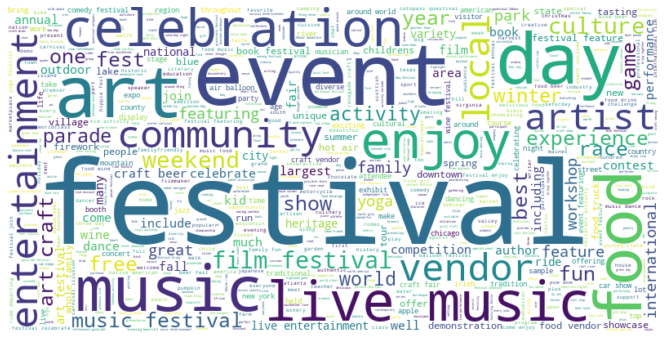

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
stop.append('festival')

In [74]:
stop.append('event')

In [75]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
events_df['Lem_words'] = events_df['Lem_words'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

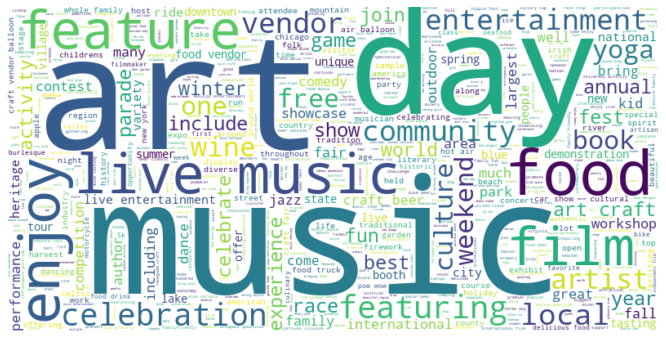

In [78]:
wc.generate(' '.join(events_df['Lem_words']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# fair, weekend, day, year, include, enjoy, 

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
count_vec = CountVectorizer()
X_train_count = count_vec.fit_transform(events_df['Lem_words'])
X_train_count.shape

(1929, 6680)

In [81]:
print(len(count_vec.get_feature_names()))

6680


In [90]:
print(count_vec.get_feature_names()[::100])

['10', '2400', '716', 'advanced', 'alone', 'area', 'augusta', 'basic', 'bib', 'bonfire', 'broadly', 'canam', 'central', 'christian', 'collect', 'conococheague', 'county', 'cubanamerican', 'decorated', 'displayed', 'earn', 'encourage', 'ever', 'family', 'filipino', 'following', 'frostbite', 'getting', 'greenfield', 'harpoon', 'hilton', 'hundred', 'indy', 'isolate', 'kalamazoo', 'land', 'lighting', 'luminaria', 'marketing', 'messiah', 'monthlong', 'natchez', 'northern', 'oneness', 'pa', 'pecan', 'pittsburgh', 'pound', 'proper', 'rally', 'remaining', 'rink', 'ryzeband', 'scotland', 'shakti', 'sipping', 'socalstyle', 'spotlight', 'stretched', 'symphony', 'terminology', 'tom', 'truefalse', 'upstate', 'vt', 'whistle', 'worldrenowned']


In [87]:
count_vec2 = CountVectorizer(ngram_range=(1,2))
X_train_count2 = count_vec2.fit_transform(events_df['Lem_words']) #fit and transform
X_train_count2.shape

(1929, 36812)

In [93]:
print(count_vec2.get_feature_names()[::1000])

['10', 'across 100', 'animal exhibit', 'attend weekend', 'beauty grandad', 'booth saturday', 'carry awesome', 'christkindlmarket come', 'competition horse', 'cranberry many', 'day virginia', 'dozen local', 'entertainment house', 'fall childrens', 'film biannual', 'four art', 'gig metroplex', 'healing therapy', 'iceland nordic', 'italian largest', 'late mayearly', 'lover across', 'midnight oasis', 'musician local', 'old purpose', 'participate creating', 'point park', 'quality art', 'richardson life', 'scenery mustsee', 'showcase erie', 'spice palette', 'surprise expanded', 'timber action', 'unfinished get', 'warner fall', 'wonderland multicultural']


In [131]:
count_vec3 = CountVectorizer(ngram_range=(1,2), min_df=7, max_df=.9, max_features=5000)
X_train_count3 = count_vec3.fit_transform(events_df['Lem_words'])
X_train_count3.shape

(1929, 1595)

In [132]:
print(count_vec3.get_feature_names()[::50])

['10', 'activity include', 'art', 'bank', 'biscuitsbluegrass smoked', 'burlesque', 'childrens activity', 'connect', 'cultural', 'dish', 'enjoy cultural', 'family friend', 'fitness', 'friend', 'gras', 'hippie car', 'indian', 'lake', 'local food', 'meditation', 'musical entertainment', 'organization', 'pie', 'project educate', 'renowned travel', 'screening', 'sit', 'stage experience', 'team', 'travel destination', 'vibe', 'wild space']


In [109]:
from sklearn.naive_bayes import MultinomialNB

In [114]:
#newsgroups_train.target_names
#events_df["Alex_targets"] = events_df['WHAT TO DO?']
events_df = events_df.rename({'WHAT TO DO?' : 'Alex_targets'}, axis='columns')

In [116]:
events_df.Alex_targets.unique()

array(['TASTEBUDS, A&E', 'ACTIVE', 'TASTEBUDS, LEARN', 'ACTIVE, A&E',
       'LEARN, A&E', 'A&E', 'TASTEBUDS', 'TASTEBUDS, ACTIVE, A&E',
       'ACTIVE, LEARN', 'A&E, TASTEBUDS', 'TASTEBUDS, A&E, ACTIVE',
       'LEARN', 'A&E, LEARN', 'A&E, ACTIVE', 'LEARN, ACTIVE, A&E',
       'ACTIVE, A&E, TASTEBUDS', 'LEARN, A&E, ACTIVE', 'LEARN, TASTEBUDS',
       'A&E, ACTIVE, LEARN', 'ACTIVE, TASTEBUDS, A&E',
       'LEARN, TASTEBUDS, A&E', 'TASTEBUDS, LEARN, A&E', nan,
       'LEARN, ACTIVE A&E', 'ACTIVE, TASTEBUDS', 'ACTIVE, LEARN, A&E',
       'TASTEBUDS, A&E, LEARN', 'ACTIVE, A&E, LEARN',
       'LEARN, A&E, TASTEBUDS', 'A&E, ACTIVE, TASTEBUDS',
       'A&E, LEARN, ACTIVE', 'LEARN, ACTIVE', 'A&E, TASTEBUDS, ACTIVE',
       'TASTEBUDS, ACTIVE, A&E, LEARN', 'TASTEBUDS, A&E, ACTIVE, LEARN'],
      dtype=object)

In [121]:
sum(events_df.Alex_targets.isna())

6

In [122]:
events_df_lab = events_df.dropna(subset=['Alex_targets'])

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words,Lem_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee...",bacon beer classic prepare 100 draft beer regi...
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,cotopaxi questival cotopaxi questival 24hour a...,"[cotopaxi, questival, cotopaxi, questival, 24h...","[cotopaxi, questiv, cotopaxi, questiv, 24hour,...",cotopaxi questival cotopaxi questival 24hour a...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi...",gluten free allergen friendly expo premier glu...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together best local b...,"[bacon, beer, classic, bring, together, best, ...","[bacon, beer, classic, bring, togeth, best, lo...",bacon beer classic bring together best local b...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo featuring 15 30mile ride...,"[bikes, beers, kalamazoo, featuring, 15, 30mil...","[bike, beer, kalamazoo, featur, 15, 30mile, ri...",bike beer kalamazoo featuring 15 30mile ride d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Arkansas,Little Rock,South,Mar,Mid Mar,The Fulcrum Festival,Music Festival,A&E,,NaN,NaN,NaN,fulcrum festival,"[fulcrum, festival]","[fulcrum, festiv]",fulcrum
1927,Florida,Coral Gables,South,Nov - Jan,Late Nov - Early Jan,The NightGarden – A Magical Light Spectacular,NaN,A&E,Journey inside Miami's most gorgeous garden at...,YES,FEE,$28 event general (general admission + discoun...,nightgarden magical light spectacular journey ...,"[nightgarden, magical, light, spectacular, jou...","[nightgarden, magic, light, spectacular, journ...",nightgarden magical light spectacular journey ...
1928,Florida,Fort Lauderdale,South,Jan,Mid Jan,The Yoga Expo Florida,NaN,ACTIVE,This 2-day event brings together the local yog...,YES,FEE,$35 event general (all day admission + early b...,yoga expo florida 2day event brings together l...,"[yoga, expo, florida, 2day, event, brings, tog...","[yoga, expo, florida, 2day, event, bring, toge...",yoga expo florida 2day brings together local y...
1929,Florida,West Palm Beach,South,Feb,Early Feb,Urban Yoga Fest and the Bohemian Collective,NaN,ACTIVE,An inspiring three day festival of like-minded...,YES,FEE,$20-$25 event general. $60 event premium (3 da...,urban yoga fest bohemian collective inspiring ...,"[urban, yoga, fest, bohemian, collective, insp...","[urban, yoga, fest, bohemian, collect, inspir,...",urban yoga fest bohemian collective inspiring ...


In [124]:
events_df_lab

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,Alex_targets,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words,Lem_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee...",bacon beer classic prepare 100 draft beer regi...
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,cotopaxi questival cotopaxi questival 24hour a...,"[cotopaxi, questival, cotopaxi, questival, 24h...","[cotopaxi, questiv, cotopaxi, questiv, 24hour,...",cotopaxi questival cotopaxi questival 24hour a...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi...",gluten free allergen friendly expo premier glu...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together best local b...,"[bacon, beer, classic, bring, together, best, ...","[bacon, beer, classic, bring, togeth, best, lo...",bacon beer classic bring together best local b...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo featuring 15 30mile ride...,"[bikes, beers, kalamazoo, featuring, 15, 30mil...","[bike, beer, kalamazoo, featur, 15, 30mile, ri...",bike beer kalamazoo featuring 15 30mile ride d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Arkansas,Little Rock,South,Mar,Mid Mar,The Fulcrum Festival,Music Festival,A&E,,NaN,NaN,NaN,fulcrum festival,"[fulcrum, festival]","[fulcrum, festiv]",fulcrum
1927,Florida,Coral Gables,South,Nov - Jan,Late Nov - Early Jan,The NightGarden – A Magical Light Spectacular,NaN,A&E,Journey inside Miami's most gorgeous garden at...,YES,FEE,$28 event general (general admission + discoun...,nightgarden magical light spectacular journey ...,"[nightgarden, magical, light, spectacular, jou...","[nightgarden, magic, light, spectacular, journ...",nightgarden magical light spectacular journey ...
1928,Florida,Fort Lauderdale,South,Jan,Mid Jan,The Yoga Expo Florida,NaN,ACTIVE,This 2-day event brings together the local yog...,YES,FEE,$35 event general (all day admission + early b...,yoga expo florida 2day event brings together l...,"[yoga, expo, florida, 2day, event, brings, tog...","[yoga, expo, florida, 2day, event, bring, toge...",yoga expo florida 2day brings together local y...
1929,Florida,West Palm Beach,South,Feb,Early Feb,Urban Yoga Fest and the Bohemian Collective,NaN,ACTIVE,An inspiring three day festival of like-minded...,YES,FEE,$20-$25 event general. $60 event premium (3 da...,urban yoga fest bohemian collective inspiring ...,"[urban, yoga, fest, bohemian, collective, insp...","[urban, yoga, fest, bohemian, collect, inspir,...",urban yoga fest bohemian collective inspiring ...


In [125]:
events_df_lab.Alex_targets = events_df_lab.Alex_targets.apply(lambda x: x.split(',')[0])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [126]:
events_df_lab

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,Alex_targets,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words,Lem_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,TASTEBUDS,Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee...",bacon beer classic prepare 100 draft beer regi...
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,cotopaxi questival cotopaxi questival 24hour a...,"[cotopaxi, questival, cotopaxi, questival, 24h...","[cotopaxi, questiv, cotopaxi, questiv, 24hour,...",cotopaxi questival cotopaxi questival 24hour a...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,TASTEBUDS,Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi...",gluten free allergen friendly expo premier glu...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,TASTEBUDS,We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together best local b...,"[bacon, beer, classic, bring, together, best, ...","[bacon, beer, classic, bring, togeth, best, lo...",bacon beer classic bring together best local b...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,ACTIVE,Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo featuring 15 30mile ride...,"[bikes, beers, kalamazoo, featuring, 15, 30mil...","[bike, beer, kalamazoo, featur, 15, 30mile, ri...",bike beer kalamazoo featuring 15 30mile ride d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Arkansas,Little Rock,South,Mar,Mid Mar,The Fulcrum Festival,Music Festival,A&E,,NaN,NaN,NaN,fulcrum festival,"[fulcrum, festival]","[fulcrum, festiv]",fulcrum
1927,Florida,Coral Gables,South,Nov - Jan,Late Nov - Early Jan,The NightGarden – A Magical Light Spectacular,NaN,A&E,Journey inside Miami's most gorgeous garden at...,YES,FEE,$28 event general (general admission + discoun...,nightgarden magical light spectacular journey ...,"[nightgarden, magical, light, spectacular, jou...","[nightgarden, magic, light, spectacular, journ...",nightgarden magical light spectacular journey ...
1928,Florida,Fort Lauderdale,South,Jan,Mid Jan,The Yoga Expo Florida,NaN,ACTIVE,This 2-day event brings together the local yog...,YES,FEE,$35 event general (all day admission + early b...,yoga expo florida 2day event brings together l...,"[yoga, expo, florida, 2day, event, brings, tog...","[yoga, expo, florida, 2day, event, bring, toge...",yoga expo florida 2day brings together local y...
1929,Florida,West Palm Beach,South,Feb,Early Feb,Urban Yoga Fest and the Bohemian Collective,NaN,ACTIVE,An inspiring three day festival of like-minded...,YES,FEE,$20-$25 event general. $60 event premium (3 da...,urban yoga fest bohemian collective inspiring ...,"[urban, yoga, fest, bohemian, collective, insp...","[urban, yoga, fest, bohemian, collect, inspir,...",urban yoga fest bohemian collective inspiring ...


In [128]:
events_df_lab.Alex_targets.unique()

array(['TASTEBUDS', 'ACTIVE', 'LEARN', 'A&E'], dtype=object)

In [213]:
count_vec4 = CountVectorizer(ngram_range=(1,2), min_df=9, max_df=.9, max_features=5000)
X_train_count4 = count_vec4.fit_transform(events_df_lab['Lem_words'])
X_train_count4.shape

(1923, 1237)

In [214]:
import numpy as np
np.sum(X_train_count4)

36766

In [152]:
multiNB = MultinomialNB()

cntvecMNB = multiNB.fit(X_train_count4[20:,], events_df_lab.Alex_targets[20:])

In [154]:
X_train_count4[:20,].shape

(20, 1594)

In [155]:
new_docs = X_train_count4[:20]
cnt_predicted = cntvecMNB.predict(new_docs)

In [156]:
cnt_predicted

array(['TASTEBUDS', 'ACTIVE', 'TASTEBUDS', 'TASTEBUDS', 'ACTIVE',
       'TASTEBUDS', 'TASTEBUDS', 'ACTIVE', 'TASTEBUDS', 'ACTIVE', 'LEARN',
       'ACTIVE', 'ACTIVE', 'LEARN', 'TASTEBUDS', 'TASTEBUDS', 'ACTIVE',
       'A&E', 'A&E', 'ACTIVE'], dtype='<U9')

In [158]:
events_df_lab.Alex_targets[:20]

0     TASTEBUDS
1        ACTIVE
2     TASTEBUDS
3     TASTEBUDS
4        ACTIVE
5     TASTEBUDS
6     TASTEBUDS
7        ACTIVE
8     TASTEBUDS
9        ACTIVE
10        LEARN
11       ACTIVE
12          A&E
13        LEARN
14    TASTEBUDS
15          A&E
16          A&E
17          A&E
18          A&E
19       ACTIVE
Name: Alex_targets, dtype: object

In [159]:
events_df_lab[0:25]

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,Alex_targets,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Desc_with_name,Desc_words,Stemmed_words,Lem_words
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,TASTEBUDS,Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee...",bacon beer classic prepare 100 draft beer regi...
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019,cotopaxi questival cotopaxi questival 24hour a...,"[cotopaxi, questival, cotopaxi, questival, 24h...","[cotopaxi, questiv, cotopaxi, questiv, 24hour,...",cotopaxi questival cotopaxi questival 24hour a...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,TASTEBUDS,Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,gluten free allergen friendly expo premier glu...,"[gluten, free, allergen, friendly, expo, premi...","[gluten, free, allergen, friendli, expo, premi...",gluten free allergen friendly expo premier glu...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,TASTEBUDS,We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together best local b...,"[bacon, beer, classic, bring, together, best, ...","[bacon, beer, classic, bring, togeth, best, lo...",bacon beer classic bring together best local b...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,ACTIVE,Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers kalamazoo featuring 15 30mile ride...,"[bikes, beers, kalamazoo, featuring, 15, 30mil...","[bike, beer, kalamazoo, featur, 15, 30mile, ri...",bike beer kalamazoo featuring 15 30mile ride d...
5,Minnesota,Minneapolis,Midwest,Apr,Mid Apr,Bacon and Beer Classic,NaN,TASTEBUDS,We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together best local b...,"[bacon, beer, classic, bring, together, best, ...","[bacon, beer, classic, bring, togeth, best, lo...",bacon beer classic bring together best local b...
6,Minnesota,St. Paul,Midwest,Jul,Mid Jul,Bacon and Beer Classic,NaN,TASTEBUDS,Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!,bacon beer classic prepare 100 draft beers reg...,"[bacon, beer, classic, prepare, 100, draft, be...","[bacon, beer, classic, prepar, 100, draft, bee...",bacon beer classic prepare 100 draft beer regi...
7,Ohio,Cincinnati,Midwest,Sep,Mid Sep,Bikes and Beers Cincinnati,NaN,ACTIVE,Featuring 15 and 30 mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers cincinnati featuring 15 30 mile ri...,"[bikes, beers, cincinnati, featuring, 15, 30, ...","[bike, beer, cincinnati, featur, 15, 30, mile,...",bike beer cincinnati featuring 15 30 mile ride...
8,Ohio,Columbus,Midwest,Sep,Late Sep,Bacon and Beer Classic,NaN,TASTEBUDS,We bring together the best local breweries and...,NO,FEE,Not in 2019.,bacon beer classic bring together best local b...,"[bacon, beer, classic, bring, together, best, ...","[bacon, beer, classic, bring, togeth, best, lo...",bacon beer classic bring together best local b...
9,Ohio,Columbus,Midwest,Oct,Early Oct,Bikes and Beers Columbus,NaN,ACTIVE,Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...,bikes beers columbus featuring 15 30mile rides...,"[bikes, beers, columbus, featuring, 15, 30mile...","[bike, beer, columbu, featur, 15, 30mile, ride...",bike beer columbus featuring 15 30mile ride de...


In [161]:
events_df_lab.iloc[16].Lem_words

'sturgis motorcycle rally 10 daysnights riding food music 500000 rider concert fanatic streetfood enjoyer attend sturgis motorcycle rally every year'

In [162]:
count_vec_bigrams = CountVectorizer(ngram_range=(2,2), min_df=7, max_df=.9, max_features=5000)
X_train_count_bi = count_vec_bigrams.fit_transform(events_df_lab['Lem_words'])
X_train_count_bi.shape

(1923, 479)

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,2), min_df=7, max_df=.9, max_features=5000)
X_train_tf = tf_idf.fit_transform(events_df_lab['Lem_words'])
X_train_tf.shape

(1923, 1594)

In [163]:
wc.generate(' '.join(X_train_count_bi))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: sequence item 0: expected str instance, csr_matrix found

In [166]:
tf_idfMNB = multiNB.fit(X_train_tf[5:], events_df_lab.Alex_targets[5:])

In [169]:
new_docs_tf = X_train_tf[:5]
tfidf_predicted = tf_idfMNB.predict(new_docs_tf)

In [170]:
tfidf_predicted

array(['TASTEBUDS', 'ACTIVE', 'TASTEBUDS', 'TASTEBUDS', 'ACTIVE'],
      dtype='<U9')

## LDA

In [175]:
import gensim

processed_docs  = []

for doc in events_df_lab['Lem_words']:
    doc = doc.split()
    processed_docs.append(doc)
    
processed_docs

[['bacon',
  'beer',
  'classic',
  'prepare',
  '100',
  'draft',
  'beer',
  'regional',
  'brewery',
  '30',
  'creative',
  'bacon',
  'dish',
  'local',
  'chef',
  'hormel',
  'bacon',
  'eating',
  'contest',
  'lawn',
  'game',
  'music',
  'much',
  'rally',
  'foodie',
  'friend',
  'get',
  'ready',
  'experience',
  'bacon',
  'beer',
  'like',
  'never'],
 ['cotopaxi',
  'questival',
  'cotopaxi',
  'questival',
  '24hour',
  'adventure',
  'race',
  'team',
  '26',
  'friend',
  'explore',
  'unknown',
  'city',
  'wild',
  'space',
  'around',
  'thing',
  'never',
  'thought',
  'possible',
  'share',
  'stoke',
  'fun',
  'supportive',
  'community'],
 ['gluten',
  'free',
  'allergen',
  'friendly',
  'expo',
  'premier',
  'gluten',
  'allergenfree',
  'consumer',
  'show',
  'united',
  'state'],
 ['bacon',
  'beer',
  'classic',
  'bring',
  'together',
  'best',
  'local',
  'brewery',
  'restaurant',
  'stadium',
  'epic',
  'venue',
  'country',
  'ultimate',
  

In [176]:
# Creating bag of words
import gensim

dictionary = gensim.corpora.Dictionary(processed_docs)

In [177]:
len(dictionary.keys())

6690

In [178]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 100
1 30
2 bacon
3 beer
4 brewery
5 chef
6 classic
7 contest
8 creative
9 dish
10 draft


In [179]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [199]:
bow_corpus[50]

[(31, 1),
 (264, 1),
 (296, 1),
 (490, 1),
 (663, 2),
 (664, 1),
 (665, 1),
 (666, 1),
 (667, 1),
 (668, 1),
 (669, 1),
 (670, 1),
 (671, 1),
 (672, 1),
 (673, 1)]

In [218]:
%%time
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, eta=0.01)


CPU times: user 3.09 s, sys: 279 ms, total: 3.37 s
Wall time: 3.44 s


In [219]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))

Topic: 0 Word: 0.014*"food" + 0.010*"fest" + 0.008*"activity" + 0.007*"ice" + 0.007*"winter" + 0.007*"new" + 0.006*"hippie" + 0.006*"show" + 0.006*"ride" + 0.006*"day"

Topic: 1 Word: 0.013*"day" + 0.009*"yoga" + 0.009*"featuring" + 0.009*"ride" + 0.008*"music" + 0.008*"celebration" + 0.007*"class" + 0.007*"show" + 0.007*"craft" + 0.007*"workshop"

Topic: 2 Word: 0.037*"film" + 0.014*"art" + 0.009*"international" + 0.009*"world" + 0.008*"race" + 0.008*"feature" + 0.007*"day" + 0.006*"independent" + 0.006*"fun" + 0.006*"food"

Topic: 3 Word: 0.020*"food" + 0.013*"craft" + 0.012*"local" + 0.011*"art" + 0.009*"live" + 0.009*"fair" + 0.009*"wine" + 0.008*"music" + 0.008*"vendor" + 0.008*"show"

Topic: 4 Word: 0.019*"music" + 0.018*"beer" + 0.015*"food" + 0.012*"bacon" + 0.011*"local" + 0.009*"fest" + 0.008*"best" + 0.008*"day" + 0.007*"live" + 0.006*"craft"

Topic: 5 Word: 0.018*"music" + 0.017*"art" + 0.016*"food" + 0.011*"live" + 0.010*"beer" + 0.010*"enjoy" + 0.009*"wine" + 0.009*"craft

In [220]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.025870  0.019618       1        1  17.553041
6      0.020360  0.032370       2        1  14.538486
7      0.014642 -0.014457       3        1  12.992348
3      0.037519  0.050940       4        1  12.164133
0     -0.015045 -0.031508       5        1  11.404148
4      0.062131  0.096572       6        1  11.283447
2     -0.194139  0.007697       7        1  10.507683
1      0.048662 -0.161231       8        1   9.556706, topic_info=     Category        Freq      Term       Total  loglift  logprob
242   Default  236.000000      film  236.000000  30.0000  30.0000
2     Default   83.000000     bacon   83.000000  29.0000  29.0000
3     Default  300.000000      beer  300.000000  28.0000  28.0000
4503  Default   41.000000  illusion   41.000000  27.0000  27.0000
20    Default  230.000000     local  230.000000  26.0000  26.0000
...       ...         ...       ...         ...      ...      ...
194    Topic8   26.672550       art  447.452515  -0.4720  -5.0738
162    Topic8   17.672846   weekend  119.795975   0.4342  -5.4854
3      Topic8   21.286310      beer  300.701752  -0.3001  -5.2993
226    Topic8   20.734953      live  354.224579  -0.4902  -5.3256
36     Topic8   16.883549       fun  207.118759  -0.1590  -5.5311

[740 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1422      4  0.097858      108
1422      6  0.880726      108
5049      4  0.877405  12pm8pm
80        2  0.230263       15
80        4  0.038377       15
...     ...       ...      ...
3820      2  0.554952    youll
3820      3  0.221981    youll
3820      6  0.166486    youll
3820      8  0.055495    youll
3644      6  0.787070   zydeco

[1758 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 8, 4, 1, 5, 3, 2])

In [221]:
from gensim import models
import warnings
warnings.filterwarnings('ignore')

# try tf * idf
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]


In [227]:
lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corpus, num_topics=8, id2word=dictionary, passes=2, eta=0.01)
lda_model_tfidf.save('lda_tfidf.model')

In [228]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))

Topic: 0 Word: 0.005*"art" + 0.005*"music" + 0.005*"live" + 0.004*"food" + 0.004*"entertainment" + 0.004*"jazz" + 0.003*"craft" + 0.003*"winter" + 0.003*"rodeo" + 0.003*"balloon"

Topic: 1 Word: 0.006*"ride" + 0.005*"wine" + 0.005*"book" + 0.005*"beer" + 0.004*"craft" + 0.004*"feature" + 0.004*"american" + 0.004*"food" + 0.004*"music" + 0.004*"featuring"

Topic: 2 Word: 0.009*"film" + 0.006*"hippie" + 0.004*"music" + 0.004*"featuring" + 0.003*"beer" + 0.003*"filmmaker" + 0.003*"fest" + 0.003*"food" + 0.003*"family" + 0.003*"show"

Topic: 3 Word: 0.006*"music" + 0.005*"art" + 0.005*"film" + 0.005*"food" + 0.004*"craft" + 0.004*"local" + 0.004*"beer" + 0.004*"pecan" + 0.004*"community" + 0.003*"featuring"

Topic: 4 Word: 0.005*"film" + 0.005*"craft" + 0.005*"food" + 0.005*"book" + 0.004*"bacon" + 0.004*"local" + 0.004*"beer" + 0.004*"live" + 0.004*"music" + 0.004*"wine"

Topic: 5 Word: 0.006*"fest" + 0.005*"comedy" + 0.005*"craft" + 0.005*"art" + 0.004*"new" + 0.004*"irish" + 0.004*"musi

In [229]:
pyLDAvis.gensim.prepare(lda_model_tfidf, tfidf_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.014078 -0.022284       1        1  14.350372
3      0.048671 -0.047418       2        1  13.943232
1      0.017076 -0.119564       3        1  13.703192
0      0.046233  0.031379       4        1  13.237434
2      0.004709  0.132755       5        1  12.660305
7      0.075317 -0.012587       6        1  12.118496
5     -0.006607  0.057341       7        1  10.039815
6     -0.199477 -0.019622       8        1   9.947154, topic_info=     Category      Freq         Term      Total  loglift  logprob
4503  Default  7.000000     illusion   7.000000  30.0000  30.0000
4010  Default  6.000000       hippie   6.000000  29.0000  29.0000
38    Default  5.000000    questival   5.000000  28.0000  28.0000
34    Default  5.000000     cotopaxi   5.000000  27.0000  27.0000
3040  Default  6.000000        pecan   6.000000  26.0000  26.0000
...       ...       ...          ...        ...      ...      ...
2      Topic8  2.115775        bacon  12.266624   0.5504  -5.8764
1100   Topic8  2.042340  interactive   7.352757   1.0269  -5.9117
63     Topic8  2.129052  celebration  17.466768   0.2033  -5.8701
402    Topic8  2.103290        world  18.353266   0.1416  -5.8823
194    Topic8  2.130263          art  31.267944  -0.3785  -5.8696

[675 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.402334        100
0         3  0.134111        100
0         4  0.134111        100
0         5  0.134111        100
0         7  0.134111        100
...     ...       ...        ...
1125      4  0.157777       york
1125      5  0.157777       york
1125      7  0.315554       york
3820      8  0.712500      youll
4979      2  1.574053  zinfandel

[1224 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3, 8, 6, 7])